#Visualisasi Hasil Prediksi Model

## Plot Hasil

#New Loading

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from cv2 import imshow
from PIL import Image
from imutils import paths
import random
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.12.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/Saved Model/new_densenet169_30_warna_final_3CAT.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/ResNet/Saved Model/new_resnet152_30_warna_1_3CAT.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/MobileNetV2/Saved Model/new_mobilenetv2_30_warna_1_3CAT.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/VGG19/Saved Model/new_vgg19_30_warna_1_3CAT.h5')

# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/Saved Model/new_densenet169_30_tipe_model_6.h5')

In [4]:
prediction_dict = {0: "Bleached", 1: "Healthy", 2: "Partially Bleached"} #Klasifikasi Tipe
# prediction_dict = {0: "Boulder", 1: "Branching", 2: "Table"} #Klasifikasi Tipe

In [5]:
def img_load(imagePaths):
  # random shuffle
  random.seed(42)
  random.shuffle(imagePaths)

  data = []
  labels = []
  image_dims = (224, 224, 3)


  for imagePath in imagePaths:
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (image_dims[1], image_dims[0]))
      image = img_to_array(image)
      data.append(image)
      l = label = imagePath.split(os.path.sep)[-2].split("_")
      labels.append(l)

  data = np.array(data, dtype="float") / 255.0
  labels = np.array(labels)
  print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

  data = np.array(data)
  label = np.array(labels)
  print(data.shape)

  mlb = MultiLabelBinarizer()
  labels = mlb.fit_transform(labels)
  # total 3 labels
  print("class labels:")
  for (i, label) in enumerate(mlb.classes_):
      print("{}. {}".format(i+1, label))
  return data,labels

In [6]:
!pip install imutils
from imutils import paths
bs = 8
lr = 0.001
size = (224, 224)
shape = (224,224, 3)
epochs = 20
class_number = 3

In [7]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/data_warna fix")))

# random shuffle
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
image_dims = (224, 224, 3)

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

520 images (611.52MB)


In [8]:
data = np.array(data)
label = np.array(labels)
print(data.shape)

(520, 224, 224, 3)


In [9]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# total 3 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. Bleached
2. Healthy
3. Partially Bleached


In [10]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20)

In [11]:
def plotimage2(imagePath,testY,i):
  img = np.asarray(Image.open(imagePath))
  # label= testY.argmax(axis=1)
  image = cv2.imread(imagePath)
  # call imshow() using plt object
  plt.imshow(img)
  plt.axis('off')
  # display that image
  image = cv2.resize(image, (224, 224))
  cv2_imshow(image)

  print('=====================================================')

  idx=maxindex[i]
  label=trueIdx[i]
  # txt="Ground-Truth: {} \nPredicted: {} \nConfidence Score: {:.5%}".format(prediction_dict[label],prediction_dict[idx],predictions[i][idx])
  txt="Predicted Class: {}".format(prediction_dict[idx])
  txtvar=plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)
  # plt.savefig("/content/drive/MyDrive/Skripsi/Program CNN/Load Model/Gambar Prediksi Model/Coral Watch/Warna/{} {}.png".format(i, prediction_dict[idx]),dpi=300,bbox_inches="tight")
  plt.savefig("/content/drive/MyDrive/Skripsi/Program CNN/Load Model/Gambar Prediksi Model/Extra/Data Lapangan Bersih semua_warna fix6/{} {}.png".format(i, prediction_dict[idx]),dpi=300,bbox_inches="tight")
  plt.show()
  txtvar.remove()
  print('=====================================================')

In [12]:
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih semua_warna fix")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih semua_warna fix2")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih semua_warna fix3")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih semua_warna fix4")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih semua_warna fix6")))

# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih warna 3/7 Juni")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih warna 3/8 Juni titik 1")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih warna 3/8 Juni titik 2")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih warna 3/8 Juni titik 3")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Warna/Data Lapangan Bersih warna 3/9 Juni")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/2. Data CoralWatch/images/CoralWatch/Data Test/Warna")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Dummy")))


# random.seed(42)
# random.shuffle(imagePaths)


In [13]:
testX,testY= img_load(imagePaths)

45 images (52.92MB)
(45, 224, 224, 3)
class labels:
1. Bleached
2. Healthy
3. Partially Bleached


In [14]:
# predictions = model.predict(testX,batch_size=bs)
# maxindex = np.argmax(predictions,axis=1)
# trueIdx=testY.argmax(axis=1)


In [15]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/data_testX', 'rb') as f:
        testX = pickle.load(f)

with open('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/data_testY', 'rb') as f:
        testY = pickle.load(f)

In [16]:
def reports(model):
  print("[INFO] evaluating network...")
  predIdxs = model.predict(testX, batch_size=bs)
  y_predict =predIdxs
  # for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)

  # show a nicely formatted classification report
  print(classification_report(testY.argmax(axis=1), predIdxs,target_names=mlb.classes_))
  print()
  print(balanced_accuracy_score(testY.argmax(axis=1), predIdxs))
  print()
  # Pembuatan Confusion Matrix Display
  cmd= metrics.confusion_matrix(testY.argmax(axis=1), np.argmax(y_predict, axis=1))
  display_label = ['Bleached', 'Healthy', 'Partially Bleached']

  cm_lr= ConfusionMatrixDisplay(cmd, display_labels = display_label )
  cm_lr.plot(cmap=plt.cm.RdPu)
  plt.grid(False)
  plt.title("Confusion Matrix Display")

  plt.show()
  print()
  print('======================================================================================')
  print()


[INFO] evaluating network...
13/13 [==============================] - 21s 1s/step
                    precision    recall  f1-score   support

          Bleached       0.81      0.91      0.86        23
           Healthy       0.72      0.79      0.75        33
Partially Bleached       0.81      0.71      0.76        48

          accuracy                           0.78       104
         macro avg       0.78      0.80      0.79       104
      weighted avg       0.78      0.78      0.78       104


0.8030851998243302



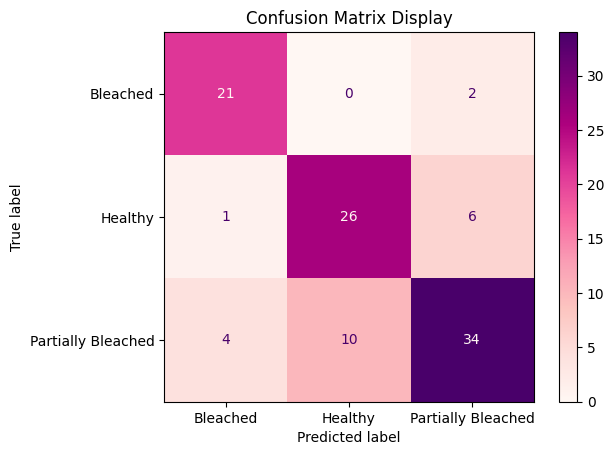

In [17]:
reports(model)

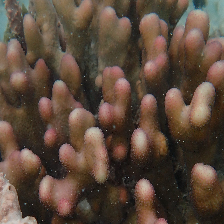

NameError: ignored

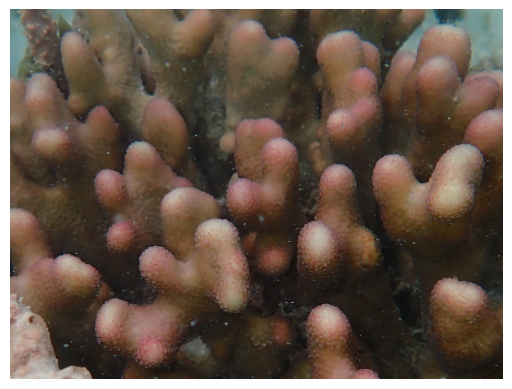

In [18]:
i=0
for imagePath in imagePaths:
    l = imagePath.split(os.path.sep)[-2].split("_")
    label = l[0]
    img_path = imagePath
    plotimage2(img_path,testY,i)
    i+=1

# img_path = r"/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih semua 2/Boulder/P6070002.JPG"
print(img_path)